# Loading the dataset

In [12]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='0SRjsRh6GYg_2xfoit5wds9evFgpoPS-mMrlVZX6A71E',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'universityadmiteligibilitypredict-donotdelete-pr-khbaqufr55adzg'
object_key = 'Admission_Predict.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [15]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [16]:
df.rename(columns = {'Serial No.':'Serial_No','GRE Score':'GRE_Score', 'TOEFL Score':'TOEFL_Score', 'University Rating':'University_Rating','Chance of Admit ':'Chance_of_Admit'}, 
          inplace = True)

In [17]:
df.columns

Index(['Serial_No', 'GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance_of_Admit'],
      dtype='object')

In [18]:
df.describe()

,Serial_No,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial_No          400 non-null    int64  
 1   GRE_Score          400 non-null    int64  
 2   TOEFL_Score        400 non-null    int64  
 3   University_Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance_of_Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [20]:
df.drop(["Serial_No"],axis=1)

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


# Exploratory Data Analysis

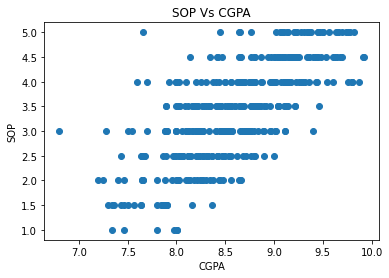

In [21]:
plt.scatter(df["CGPA"],df.SOP)
plt.xlabel("CGPA")
plt.ylabel("SOP")
plt.title("SOP Vs CGPA")
plt.show()

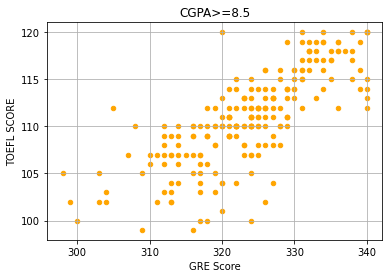

In [22]:
df[df.CGPA >= 8.5].plot(kind='scatter', x='GRE_Score', y='TOEFL_Score',color="orange")
plt.xlabel("GRE Score")
plt.ylabel("TOEFL SCORE")
plt.title("CGPA>=8.5")
plt.grid(True)
plt.show()

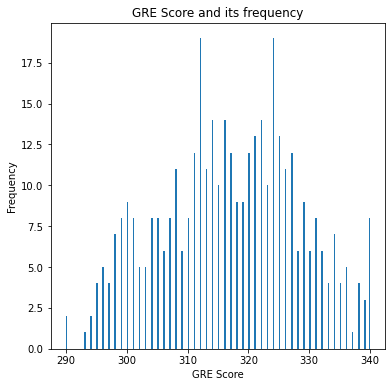

In [23]:
df["GRE_Score"].plot(kind = 'hist',bins = 200,figsize = (6,6))
plt.title("GRE Score and its frequency")
plt.xlabel("GRE Score")
plt.ylabel("Frequency")
plt.show()

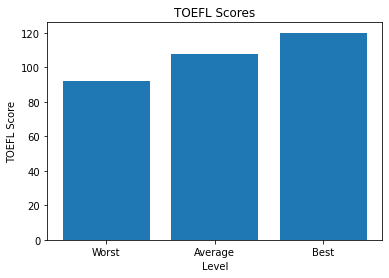

In [24]:
y = np.array([df["TOEFL_Score"].min(),df["TOEFL_Score"].mean(),df["TOEFL_Score"].max()])
x = ["Worst","Average","Best"]
plt.bar(x,y)
plt.title("TOEFL Scores")
plt.xlabel("Level")
plt.ylabel("TOEFL Score")
plt.show()

<AxesSubplot:xlabel='University_Rating', ylabel='GRE_Score'>

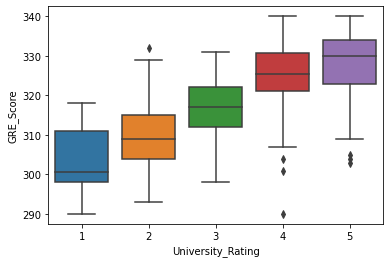

In [25]:
sns.boxplot(x="University_Rating",y="GRE_Score",data=df)

<AxesSubplot:xlabel='University_Rating', ylabel='TOEFL_Score'>

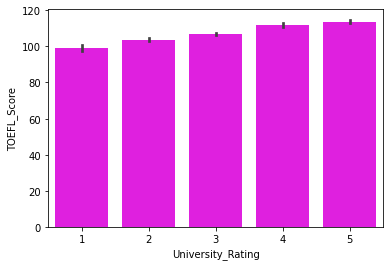

In [26]:
sns.barplot(x="University_Rating",y="TOEFL_Score",data=df,color="magenta")

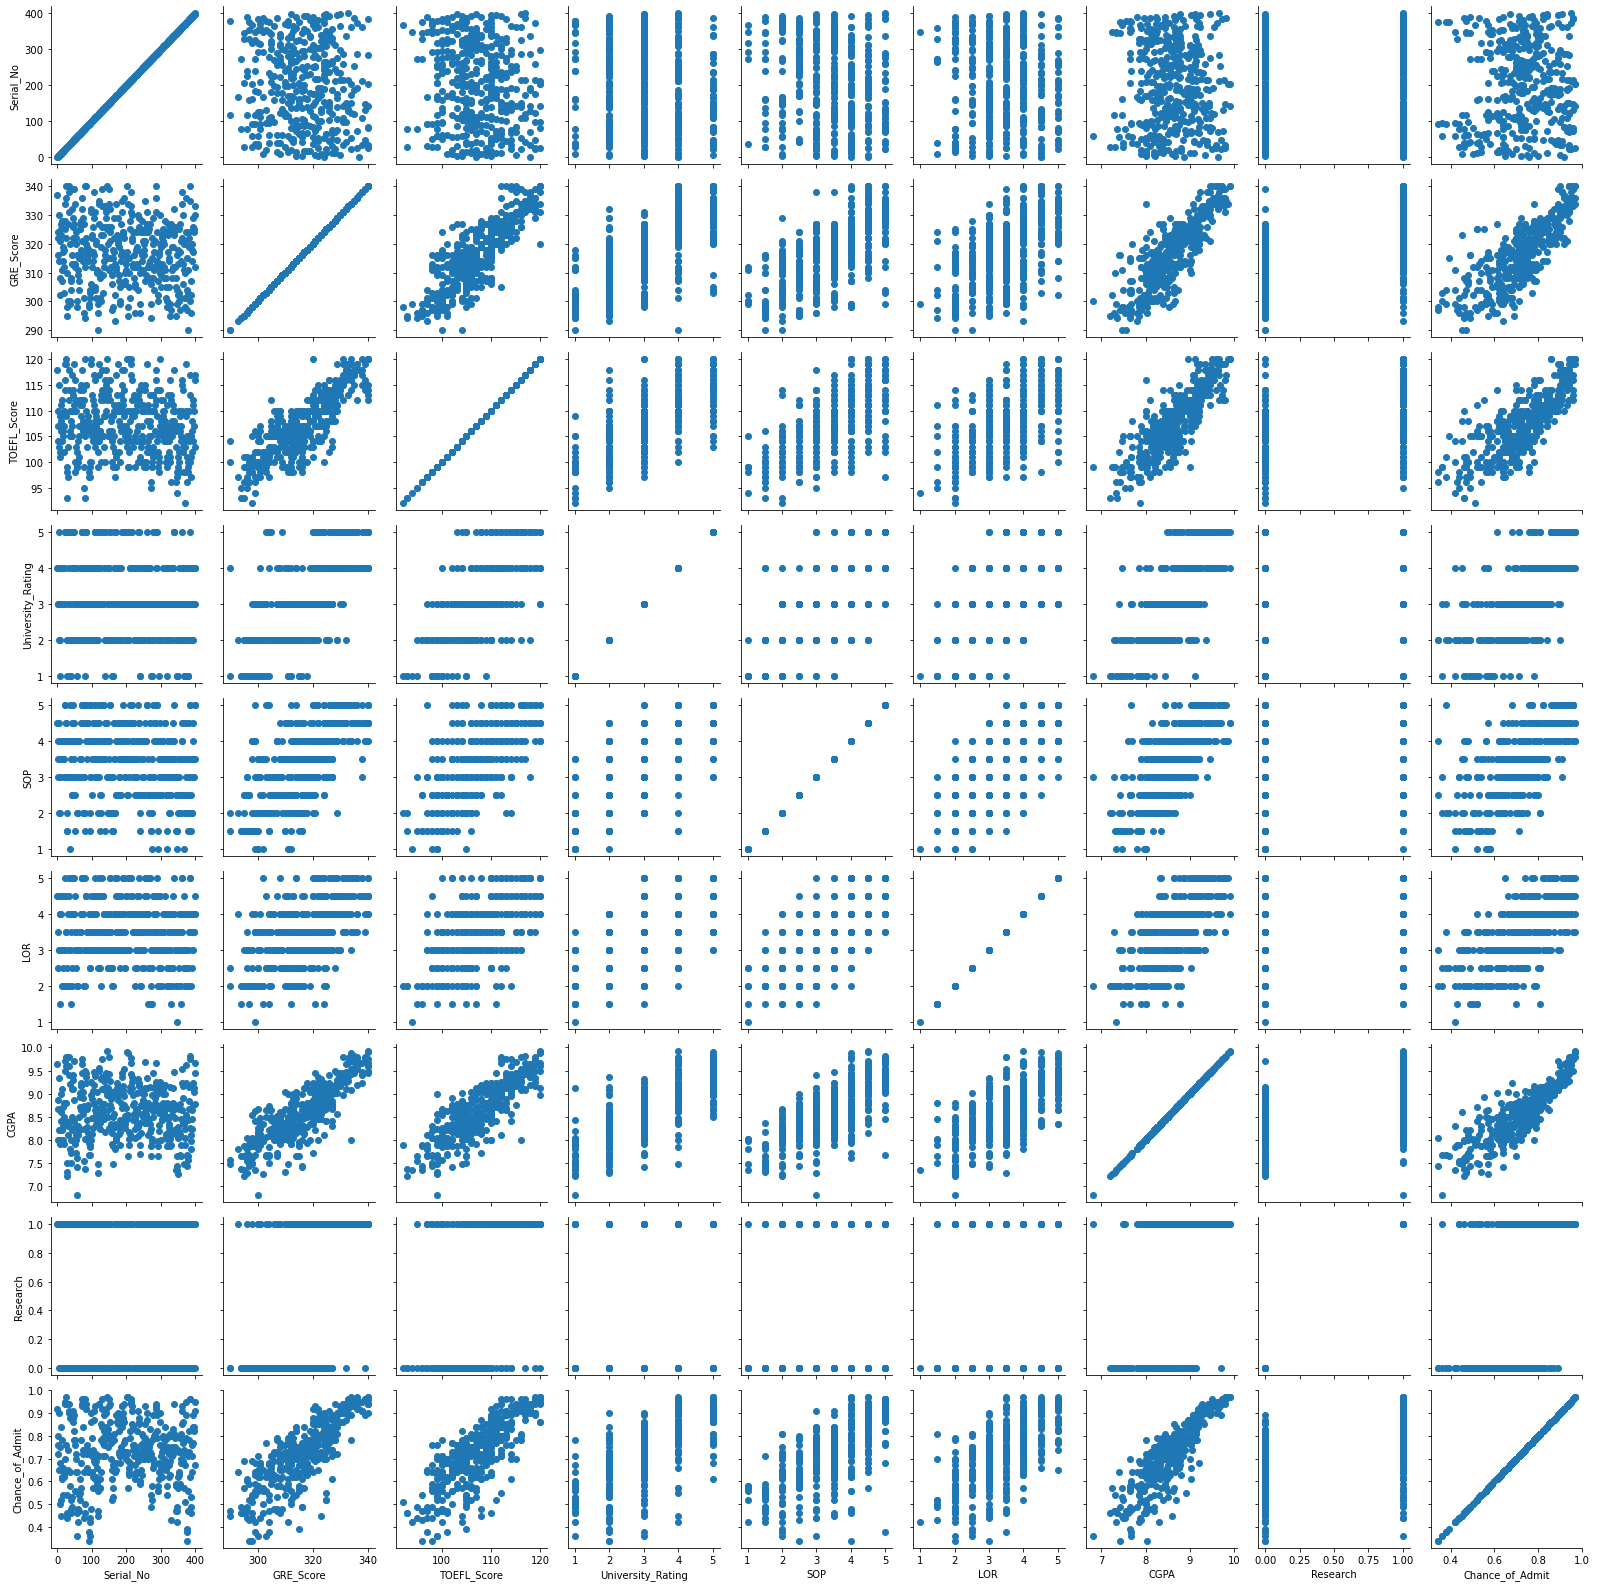

In [27]:
df_p=sns.PairGrid(df)
df_p.map(plt.scatter)

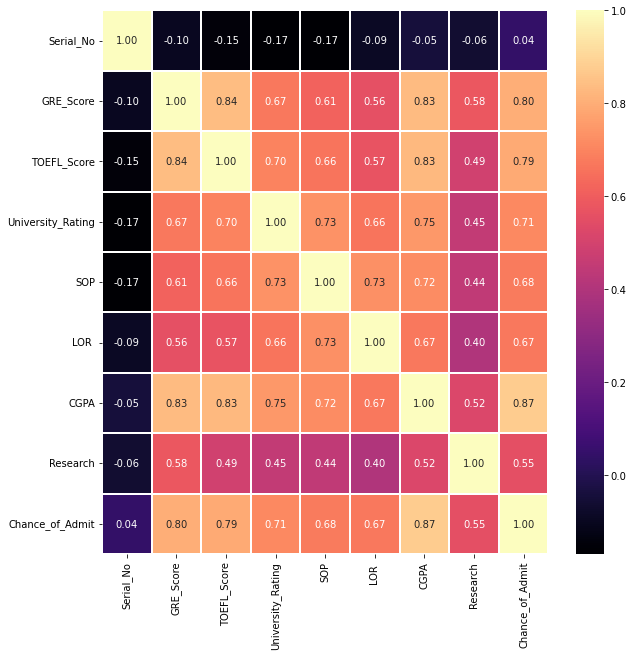

In [28]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

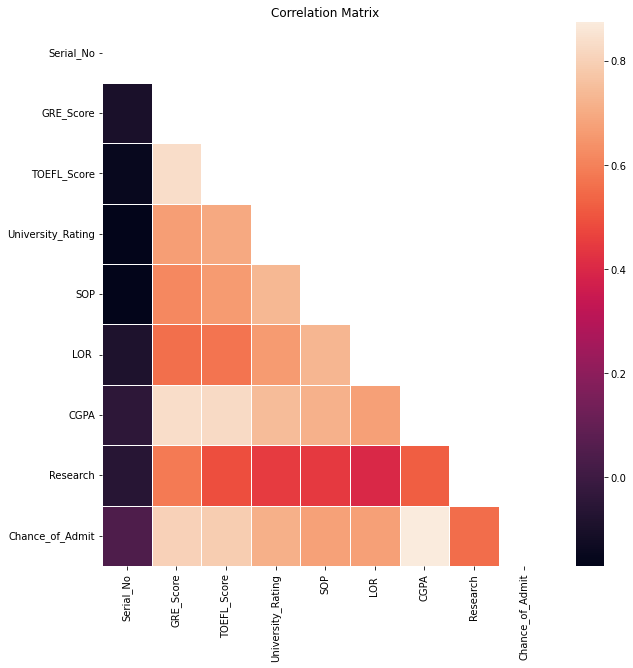

In [29]:
corr=df.corr()
mask=np.triu(np.ones_like(corr,dtype=bool))
plt.figure(figsize=(10,10))
plt.title("Correlation Matrix")
sns.heatmap(corr,mask=mask,cmap="rocket",linewidths=.5)
plt.show()

In [30]:
var = df[df.columns[1:]].corr()['Chance_of_Admit'][:]
var.sort_values(ascending=False)

Chance_of_Admit      1.000000
CGPA                 0.873289
GRE_Score            0.802610
TOEFL_Score          0.791594
University_Rating    0.711250
SOP                  0.675732
LOR                  0.669889
Research             0.553202
Name: Chance_of_Admit, dtype: float64

<AxesSubplot:xlabel='University_Rating', ylabel='Chance_of_Admit'>

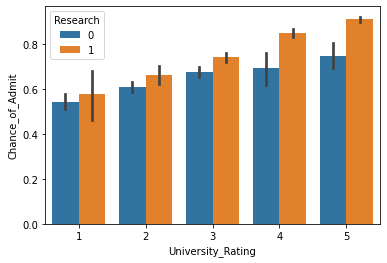

In [31]:
sns.barplot(x="University_Rating", y="Chance_of_Admit", hue="Research", data=df)

# Model Building

In [32]:
y = df["Chance_of_Admit"].values
x = df.drop(["Chance_of_Admit"],axis=1)

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state=1)

In [34]:
from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler(feature_range=(0, 1))
x_train[x_train.columns] = scalerX.fit_transform(x_train[x_train.columns])
x_test[x_test.columns] = scalerX.transform(x_test[x_test.columns])

# Training the model using different algorithms

## Linear regression

In [35]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [36]:
LinearRegression()

LinearRegression()

In [37]:
y_predict = model.predict(x_test)
score=model.score(x_test, y_test)
print(score)

0.8277102420849571


In [38]:
print(y_predict[0:5])
print(y_test[0:5])

[0.74829155 0.67046093 0.81521024 0.80935301 0.85037486]
[0.67 0.64 0.8  0.81 0.86]


# Performance metrics

In [39]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

print('Mean Absolute Error:', mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 0.04435721469748695
Mean Squared Error: 0.003984620608070285
Root Mean Squared Error: 0.06312385134060092


In [40]:
import pickle
pickle.dump(model,open("model.pkl","wb"))

# Deployment

In [2]:
!pip install -U ibm-watson-machine-learning

     |████████████████████████████████| 1.8 MB 22.7 MB/s eta 0:00:01
  Attempting uninstall: ibm-watson-machine-learning
    Found existing installation: ibm-watson-machine-learning 1.0.255
    Uninstalling ibm-watson-machine-learning-1.0.255:
      Successfully uninstalled ibm-watson-machine-learning-1.0.255


In [3]:
from ibm_watson_machine_learning import APIClient
import json
import numpy as np

# Authenticate and Set Space

In [4]:
wml_credentials = {
    "apikey":"Jeb0g58pvgNysUSRkeGY1N2ia4NmTRGIQNZonG46ZMGE",
    "url":"https://us-south.ml.cloud.ibm.com"
}

In [5]:
wml_client = APIClient(wml_credentials)

In [6]:
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  --------------------------------------  ------------------------
ID                                    NAME                                    CREATED
8b652aee-bdf7-44d5-87b1-16f806de6b5b  University Admit Eligibility Predictor  2022-10-29T15:05:53.886Z
------------------------------------  --------------------------------------  ------------------------


In [7]:
SPACE_ID = "8b652aee-bdf7-44d5-87b1-16f806de6b5b"

In [8]:
wml_client.set.default_space(SPACE_ID)

'SUCCESS'

In [9]:
wml_client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
runtime-22.1-py3.9             12b83a1

# Save and deploy the model

In [11]:
import sklearn
sklearn.__version__

'1.0.2'

In [42]:
MODEL_NAME = "University Admit Eligibility Predictor"
DEPLOYMENT_NAME = "University Admit Eligibility Predictor"
DEMO_MODEL = model

In [43]:
software_spec_uid = wml_client.software_specifications.get_id_by_name('runtime-22.1-py3.9')

In [44]:
model_props = {
    wml_client.repository.ModelMetaNames.NAME: MODEL_NAME,
    wml_client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.0',
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid
}

In [45]:
model_details = wml_client.repository.store_model(
    model = DEMO_MODEL,
    meta_props = model_props,
    training_data = x_train,
    training_target = y_train
)

In [46]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'l1',
  'schemas': {'input': [{'fields': [{'name': 'Serial_No', 'type': 'float64'},
      {'name': 'GRE_Score', 'type': 'float64'},
      {'name': 'TOEFL_Score', 'type': 'float64'},
      {'name': 'University_Rating', 'type': 'float64'},
      {'name': 'SOP', 'type': 'float64'},
      {'name': 'LOR ', 'type': 'float64'},
      {'name': 'CGPA', 'type': 'float64'},
      {'name': 'Research', 'type': 'float64'}],
     'id': '1',
     'type': 'struct'}],
   'output': []},
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'type': 'scikit-learn_1.0'},
 'metadata': {'created_at': '2022-10-29T15:32:47.546Z',
  'id': 'b3207c5f-2393-4c42-be49-3fe244d686ab',
  'modified_at': '2022-10-29T15:32:52.321Z',
  'name': 'University Admit Eligibility Predictor',
  'owner': 'IBMid-66800088MY',
  'resource_key': '40c7ee9b-1bce-4766-8821-dccf2682b2f0',
  'space_id': '8b652aee-bdf7-44d5-87b1

In [47]:
model_id = wml_client.repository.get_model_id(model_details)

In [48]:
model_id

'b3207c5f-2393-4c42-be49-3fe244d686ab'

In [49]:
deployment_props = {
    wml_client.deployments.ConfigurationMetaNames: DEPLOYMENT_NAME,
    wml_client.deployments.ConfigurationMetaNames.ONLINE: {}
}

In [50]:
deployment = wml_client.deployments.create(
    artifact_uid = model_id,
    meta_props = deployment_props
)



#######################################################################################

Synchronous deployment creation for uid: 'b3207c5f-2393-4c42-be49-3fe244d686ab' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='39f966cc-3373-40c1-9fad-53f7d10a124e'
------------------------------------------------------------------------------------------------


